   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   69    1   0       160   234    1        2      131      0      0.1      1   
1   69    0   0       140   239    0        0      151      0      1.8      0   
2   66    0   0       150   226    0        0      114      0      2.6      2   
3   65    1   0       138   282    1        2      174      0      1.4      1   
4   64    1   0       110   211    0        2      144      1      1.8      1   

   ca  thal  condition  
0   1     0          0  
1   2     0          0  
2   0     0          0  
3   1     0          1  
4   0     0          0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       29

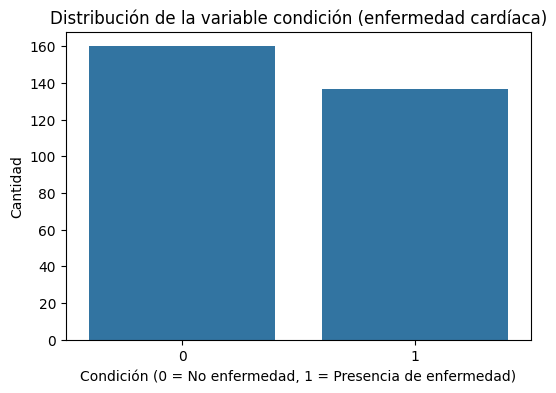

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar los datos
df = pd.read_csv('heart.csv')

# Mostrar las primeras filas
print(df.head())

# Información general del dataset
print(df.info())

# Distribución de la variable objetivo
plt.figure(figsize=(6,4))
sns.countplot(x='condition', data=df)
plt.title('Distribución de la variable condición (enfermedad cardíaca)')
plt.xlabel('Condición (0 = No enfermedad, 1 = Presencia de enfermedad)')
plt.ylabel('Cantidad')
plt.show()

In [5]:
from sklearn.preprocessing import StandardScaler

# Revisar valores nulos
print("Valores nulos por columna:\n", df.isnull().sum())

# Verificar valores únicos por columna (para identificar categóricas mal codificadas)
print("\nValores únicos por columna:\n", df.nunique())

# Escalamos las variables numéricas
X = df.drop('condition', axis=1)
y = df['condition']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Guardamos los datos escalados en un nuevo DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df['condition'] = y.values

# Guardamos el dataset preprocesado
X_scaled_df.to_csv('heart_preprocessed.csv', index=False)

Valores nulos por columna:
 age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

Valores únicos por columna:
 age           41
sex            2
cp             4
trestbps      50
chol         152
fbs            2
restecg        3
thalach       91
exang          2
oldpeak       40
slope          3
ca             4
thal           3
condition      2
dtype: int64


In [6]:
# Cargar el dataset ya preprocesado
df = pd.read_csv('heart_preprocessed.csv')

# Variable dependiente (objetivo)
y = df['condition']

# Variables independientes
X = df.drop('condition', axis=1)

# Confirmar las variables seleccionadas
print("Variables independientes:\n", X.columns)
print("\nVariable dependiente:\n", y.name)

Variables independientes:
 Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

Variable dependiente:
 condition


In [7]:
from sklearn.model_selection import train_test_split

# División del dataset: 80% entrenamiento y 20% prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Confirmar dimensiones
print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)

Tamaño del conjunto de entrenamiento: (237, 13)
Tamaño del conjunto de prueba: (60, 13)


In [8]:
from sklearn.linear_model import LogisticRegression

# Inicializar y entrenar el modelo
modelo_logistico = LogisticRegression(max_iter=1000)
modelo_logistico.fit(X_train, y_train)

# Verificar el score de entrenamiento
score_entrenamiento = modelo_logistico.score(X_train, y_train)
print("Precisión en entrenamiento:", score_entrenamiento)

Precisión en entrenamiento: 0.8481012658227848


In [9]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Predicciones sobre el conjunto de prueba
y_pred = modelo_logistico.predict(X_test)

# Métricas de evaluación
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred))
print("Precisión general (accuracy):", accuracy_score(y_test, y_pred))

Matriz de confusión:
 [[32  0]
 [ 5 23]]

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.86      1.00      0.93        32
           1       1.00      0.82      0.90        28

    accuracy                           0.92        60
   macro avg       0.93      0.91      0.91        60
weighted avg       0.93      0.92      0.92        60

Precisión general (accuracy): 0.9166666666666666


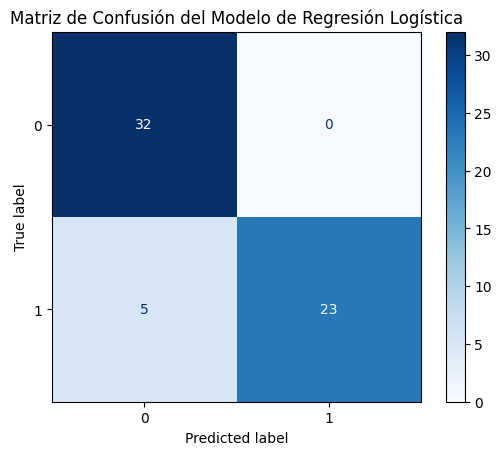

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Mostrar la matriz de confusión como gráfico
ConfusionMatrixDisplay.from_estimator(modelo_logistico, X_test, y_test, cmap='Blues')
plt.title("Matriz de Confusión del Modelo de Regresión Logística")
plt.show()